# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [5]:
import requests
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [6]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle",'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [7]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [8]:
table = soup.find("div",attrs={"lister-list"})
print(table.prettify()[1:500])



div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt9777666">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt9777666/">
    <img alt="The Tomorrow War" class="loadlate" data-tconst="tt9777666" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNTI2YTI0MWEtNGQ4OS00ODIzLWE1MWEtZGJiN2E3ZmM1OWI1XkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_UX67_CR0,0,


Finding row length.

In [9]:
row = table.find_all("div",attrs={"lister-item mode-advanced"})
row_length = len(row)
row_length

50

Do the scrapping process here (please change this markdown with your explanation)

In [10]:
temp = [] #initiating a tuple

for ListMovie in row:
    
    #get movie title
    Title = ListMovie.h3.a.text
        
    #get movie rating
    Rating = ListMovie.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n','') if ListMovie.find('div', class_ = 'inline-block ratings-imdb-rating') else '0' 
    
    #get metascore
    Metascore = ListMovie.find('span', class_= 'metascore').text.replace(' ','') if ListMovie.find('span', class_= 'metascore') else '0'
    
    #get votes 
    Votes = ListMovie.find('span', attrs = {'name': "nv"}).text if ListMovie.find('span', attrs = {'name': "nv"}) else '0'
    
    
    temp.append((Title,Rating,Metascore,Votes))

temp

[('The Tomorrow War', '6.7', '45', '84,554'),
 ('Black Widow', '7.0', '68', '69,421'),
 ('Loki', '8.9', '0', '76,867'),
 ('Fear Street: 1994', '6.2', '67', '23,692'),
 ('Sex/Life', '5.5', '0', '7,040'),
 ('F9', '5.5', '58', '29,776'),
 ('No Sudden Move', '6.6', '77', '9,586'),
 ('Fear Street: 1978', '6.8', '61', '10,241'),
 ('Luca', '7.5', '71', '58,710'),
 ('What If...?', '0', '0', '0'),
 ('The Boss Baby: Family Business', '6.0', '40', '4,266'),
 ('In the Heights', '7.5', '84', '26,094'),
 ('Gossip Girl', '5.4', '0', '1,367'),
 ("Hitman's Wife's Bodyguard", '6.3', '32', '14,251'),
 ("The King's Man", '0', '0', '0'),
 ('Cruella', '7.4', '59', '89,878'),
 ('Mare of Easttown', '8.5', '0', '70,921'),
 ('The Forever Purge', '5.8', '54', '2,397'),
 ('Beckett', '0', '0', '0'),
 ('Monsters at Work', '7.4', '0', '942'),
 ('Till Death', '5.8', '66', '3,817'),
 ('Resident Evil: Infinite Darkness', '6.0', '0', '3,783'),
 ('The Suicide Squad', '0', '0', '0'),
 ('Sweet Tooth', '8.0', '0', '31,213')

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Title','Rating','Metascore','Votes'))
df.head()

,Title,Rating,Metascore,Votes
0,The Tomorrow War,6.7,45,"84,554"
1,Black Widow,7.0,68,"69,421"
2,Loki,8.9,0,"76,867"
3,Fear Street: 1994,6.2,67,"23,692"
4,Sex/Life,5.5,0,"7,040"


In [12]:
#Cek type data
df.dtypes

Title        object
Rating       object
Metascore    object
Votes        object
dtype: object

In [13]:
#menghilangkan tanda baca koma "," pada kolom votes
df["Votes"] = df["Votes"].str.replace(",","")

#Mengubah Type Data Rating menjadi Float '
df["Rating"] = df["Rating"].astype("float64")

#Mengubah Type Data Votes' , 'Metascore' Menjadi Int
df[["Votes","Metascore"]] = df[["Votes","Metascore"]] .astype("int64")

df.dtypes

Title         object
Rating       float64
Metascore      int64
Votes          int64
dtype: object

In [14]:
#describe tentang data
df.describe().round(2)

,Rating,Metascore,Votes
count,50.00,50.00,50.00
mean,5.38,26.56,26932.14
std,3.03,30.71,40342.13
min,0.00,0.00,0.00
25%,5.43,0.00,885.00
50%,6.35,0.00,7003.50
75%,7.40,57.75,30853.75
max,9.20,84.00,193673.00


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [15]:

top = df.groupby('Title').sum()[["Rating"]].sort_values(by="Rating",ascending=False)
top.head()

,Rating
Title,
Leverage: Redemption,9.2
Loki,8.9
Young Royals,8.6
Mare of Easttown,8.5
Star Wars: The Bad Batch,8.3


In [16]:
top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Leverage: Redemption to Space Jam: A New Legacy
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0+ bytes


In [26]:
import matplotlib.pyplot as plt


In [18]:

#Mengkelompokan Rating Film

def rating(rating):
    if rating>=7.5:
        return "Excellent"
    elif rating>=6.0:
        return 'Good'
    else:
        return 'Average'

In [19]:

df['Category Rating']=df['Rating'].apply(rating)
CRating= df.groupby('Category Rating')
CRating.get_group('Excellent').reset_index()

,index,Title,Rating,Metascore,Votes,Category Rating
0,2,Loki,8.9,0,76867,Excellent
1,8,Luca,7.5,71,58710,Excellent
2,11,In the Heights,7.5,84,26094,Excellent
3,16,Mare of Easttown,8.5,0,70921,Excellent
4,23,Sweet Tooth,8.0,0,31213,Excellent
5,27,Leverage: Redemption,9.2,0,3757,Excellent
6,34,Young Royals,8.6,0,6967,Excellent
7,39,WandaVision,8.0,0,193673,Excellent
8,40,Star Wars: The Bad Batch,8.3,0,11491,Excellent
9,42,The Mysterious Benedict Society,7.7,0,866,Excellent


In [ ]:
Jadi kesimpulanya Terdapat 14 Judul Film yang mendapatkan rating >7.5( Excellent) Pada tahun 2021

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:ylabel='Film'>

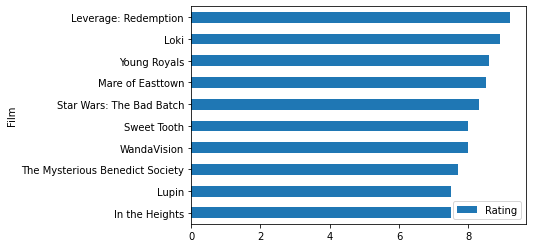

In [25]:
#10 Film Terbaik Berdasarkan Rating ( Plot)
top.head(10).sort_values(by="Rating",ascending=True).plot(kind="barh",xlabel="Film",ylabel="Value")





Dari Top 10 Film, Terdapat 7 Film yang memiliki rating diatas 8, dan 3 film yang memiliki rating dibawah 8